# SVR

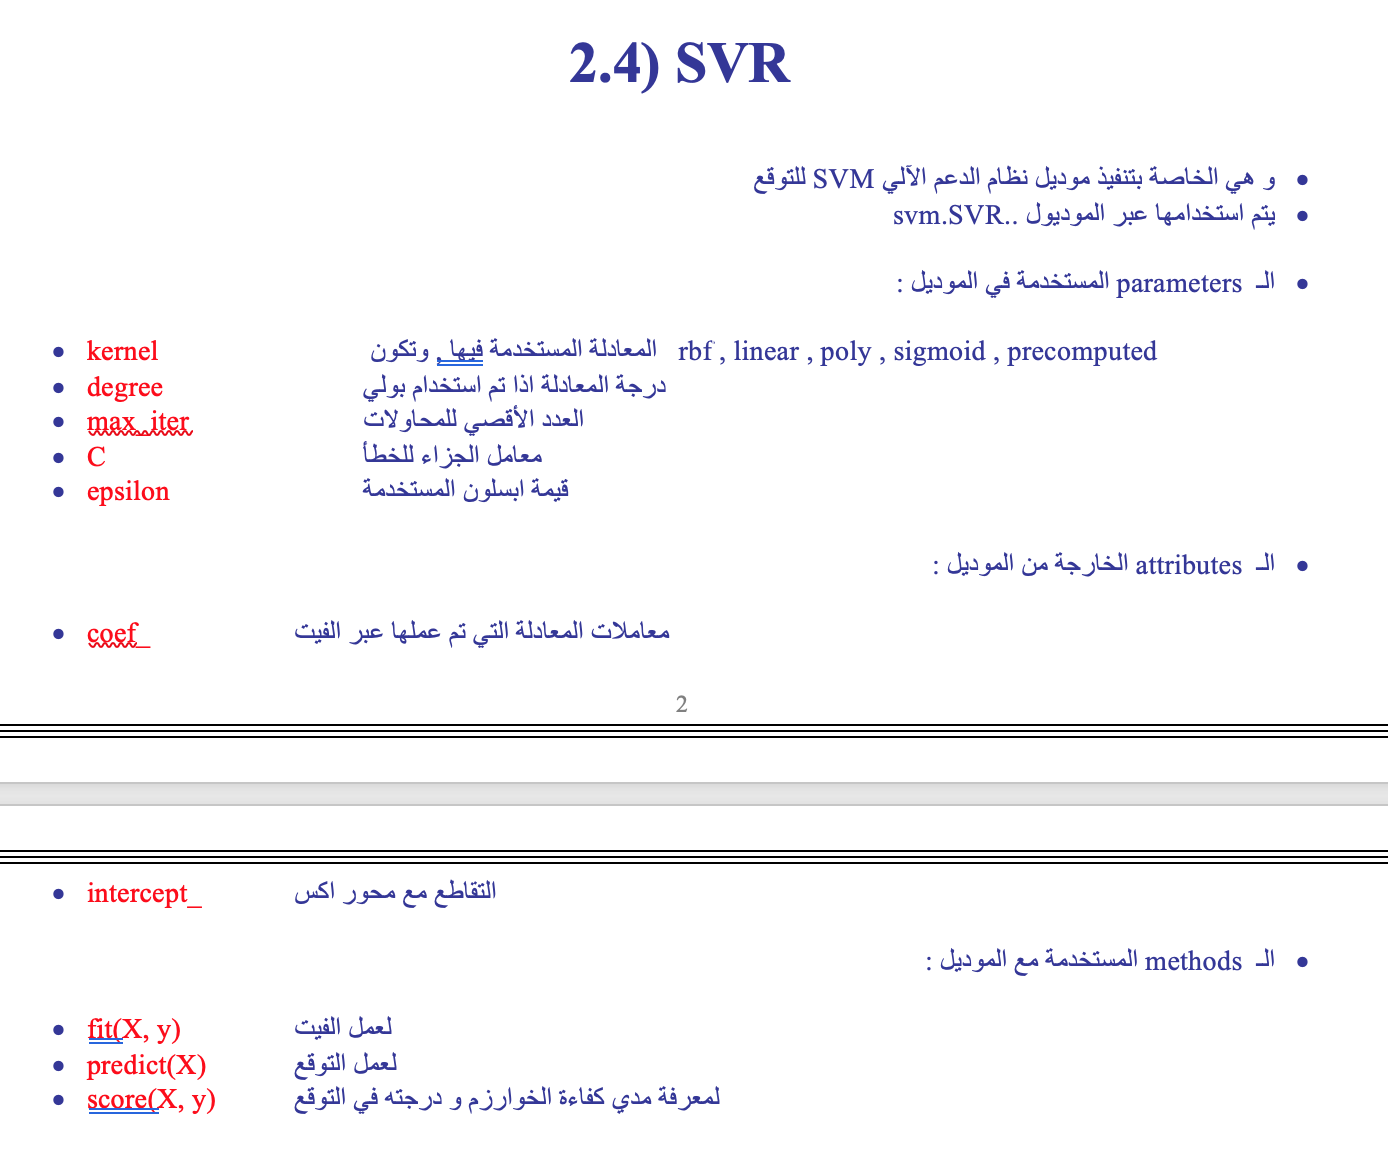

In [1]:
from IPython.display import Image
Image(filename='1.png')

In [120]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error


## 1st Example :Boston Data 

In [18]:
#load boston data
BostonData = load_boston()
#X Data
X = BostonData.data
#y Data
y = BostonData.target

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [32]:
#Applying SVR Model 
'''
sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001,
                C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False,max_iter=-1)
'''

SVRModel = SVR(kernel='linear', C=100, epsilon=.1 )# it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
#Calculating Details
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))


SVRModel Train Score is :  0.5540113939302325
SVRModel Test Score is :  0.5863773019959237


In [34]:
#Calculating Prediction
y_pred = SVRModel.predict(X_test)

In [35]:
# Evaluation
MAEValue = mean_absolute_error(y_test, y_pred) # it can be raw_values
MSEValue = mean_squared_error(y_test, y_pred) # it can be raw_values
MdSEValue = median_absolute_error(y_test, y_pred)

print('Mean Absolute Error Value is : ', MAEValue)
print('Mean Squared Error Value is : ', MSEValue)
print('Median Squared Error Value is : ', MdSEValue )


Mean Absolute Error Value is :  4.34977766820948
Mean Squared Error Value is :  40.683036044074704
Median Squared Error Value is :  3.289466596737192


## 2nd Example

In [52]:
data = pd.read_csv('Earthquakes.csv')
data.head()

,latitude,longitude,depth,mag,gap,dmin,rms,horizontalError,depthError,magError,meter
0,5.1033,125.3179,44.32,4.3,131,1.970,0.70,5.0,9.3,0.126,18.0
1,-8.8535,117.1527,116.88,4.9,59,2.991,1.06,6.5,7.3,0.091,38.0
2,4.7512,96.2239,10.00,5.3,148,0.862,1.29,6.6,1.8,0.073,18.0
3,-10.1202,118.7274,10.00,4.5,86,3.764,0.95,7.6,1.9,0.084,42.0
4,1.4361,127.0142,120.78,4.5,105,0.748,0.76,8.0,6.6,0.089,37.0


In [53]:
# Clear data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imp.fit_transform(data)

In [54]:
# Scaling data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
data = SC.fit_transform(data)


In [63]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(1369, 10)
(1369,)


In [65]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [80]:
#Applying SVR Model 
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C = 100, epsilon=.1)
svr_model.fit(X_train, y_train)

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
#Calculating Details
print('SVRModel Train Score is : ' , svr_model.score(X_train, y_train))
print('SVRModel Test Score is : ' , svr_model.score(X_test, y_test))
# awesome score!

SVRModel Train Score is :  0.9911207899200908
SVRModel Test Score is :  0.8005128095340357


In [85]:
# predicted value
y_pred = svr_model.predict(X_test)


In [86]:
# Evaluatoin 
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

0.1941441933601777
0.13754957035542537


## 3rd Example

In [87]:
data= pd.read_csv('houses.csv')
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [89]:
# Clear data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan)
data= imp.fit_transform(data)


In [90]:
# Scaling data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
data = SC.fit_transform(data)

In [92]:
X = data[:,:-1]
y = data[:, -1]
print(X.shape)
print(y.shape)

(1000, 17)
(1000,)


In [93]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [115]:
#Applying SVR Model 
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C= 5, epsilon=.1)
svr_model.fit(X_train, y_train)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
#Calculating Details
print('SVRModel Train Score is : ' , svr_model.score(X_train, y_train))
print('SVRModel Test Score is : ' , svr_model.score(X_test, y_test))


SVRModel Train Score is :  0.9709738858642197
SVRModel Test Score is :  0.7229949978742567


In [117]:
# predicted value
y_pred = svr_model.predict(X_test)

In [119]:
# Evaluatoin 
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

0.2595970012287694
0.22280904367274457


## 4th Example comparison between SVR & LinearRegression

In [121]:
# get data
BostonData = load_boston()
X = BostonData.data
y = BostonData.target

In [122]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


#### Applying `Linear Regression Model`


In [127]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
print('Linear Regression Train Score is:\n' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is:\n' , LinearRegressionModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)

#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is:\n', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is:\n', MSEValue)

#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is:\n', MdSEValue )



Linear Regression Train Score is:
 0.7391405291456343
Linear Regression Test Score is:
 0.7194574243020477
----------------------------------------------------
Mean Absolute Error Value is:
 3.639793518611547
Mean Squared Error Value is:
 27.593562379656625
Median Squared Error Value is:
 2.5619786821948516


#### Applying `SVR Model`


In [131]:
SVRModel = SVR(kernel='rbf', C=100, epsilon=.1)
SVRModel.fit(X_train, y_train)

#Calculating Details
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVRModel.predict(X_test)

#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is:\n ', MAEValue)


#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is:\n ', MSEValue)


#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is:\n ', MdSEValue )

SVRModel Train Score is :  0.9998715180636855
SVRModel Test Score is :  0.09826449680319493
----------------------------------------------------
Mean Absolute Error Value is:
  6.431626279226551
Mean Squared Error Value is:
  88.69275829349175
Median Squared Error Value is:
  3.557711343907876


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
